## Announcements

0-5 mins

- Textbook
- Come to OH / Piazza
- Feedback form
- Attendance


In [39]:
import numpy as np
from datascience import *
%matplotlib inline
np.set_printoptions(threshold=50)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Review

5-10 mins

In [4]:
# This table can be found online: https://www.statcrunch.com/app/index.php?dataid=1843341
nba = Table.read_table('http://inferentialthinking.com/notebooks/nba_salaries.csv').relabeled(3, 'SALARY').drop(2)
nba

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [5]:
nba.where(1, 'PG').where(2, are.above(15)).column(0)

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], 
      dtype='<U24')

In [6]:
nba.with_row(['Sam Lau', 'C', 0.0])
nba.where('PLAYER', are.containing('Sam'))

PLAYER,POSITION,SALARY
Sam Dekker,SF,1.6464
JaKarr Sampson,SG,0.258489


## Population & Age

10-30 mins

In [7]:
# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A copy can be accessed here in case census.gov moves the file:
# data = 'http://inferentialthinking.com/notebooks/nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


Go back to slide and discuss columns SEX and AGE

In [9]:
partial = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')
partial.show(2)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564


In [11]:
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop.show(2)

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564


In [12]:
us_pop.column('2015') - us_pop.column('2010')

array([  26708,   10676, -124279, ...,    7990,   16828, 5930703])

Explain percent formatter for a bit here.

In [13]:
change = us_pop.column('2015') - us_pop.column('2010')
census = us_pop.with_columns(
    'Change', change,
    'Percent Change', change/us_pop.column('2010')
)
census.set_format('Percent Change', PercentFormatter)

SEX,AGE,2010,2015,Change,Percent Change
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


In [14]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Percent Change
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


Discussion question: If I assume the US population grows exponentially, how would I find the growth rate each year?

Don't worry if you don't know the answer right away.

In [15]:
(321418820/309346863) ** (1/5) - 1

0.007685750230353783

Here's how to do it without copy-pasting numbers:

In [16]:
everyone = census.sort('Change', descending=True).row(0)
everyone

Row(SEX=0, AGE=999, 2010=309346863, 2015=321418820, Change=12071957, Percent Change=0.039024016222204264)

In [17]:
type(everyone)

datascience.tables.Row

In [18]:
(everyone.item(3)/everyone.item(2)) ** (1/5) - 1

0.0076857502303537828

In [19]:
five_year_rate = everyone.item(5)
(five_year_rate + 1) ** (1/5) - 1

0.0076857502303537828

## Population & Gender

30-50 mins

Lots more 68-year-olds than there used to be:

Why?

In [21]:
census.sort('Change', descending=True)

SEX,AGE,2010,2015,Change,Percent Change
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


In [24]:
2010-68 # Bombing of Pearl Harbor was 12/7/1941, people stopped having babies

1942

In [25]:
2015-68 # Bombing of Nagasaki was 8/9/1945, soldiers came home

1947

Take attendance

In [20]:
us_pop.where('AGE', are.above(97)).show()

SEX,AGE,2010,2015
0,98,47037,61991
0,99,32178,43641
0,100,54410,76974
0,999,309346863,321418820
1,98,9505,14719
1,99,6104,9577
1,100,9352,15088
1,999,152088043,158229297
2,98,37532,47272
2,99,26074,34064


In [26]:
us_pop_2015 = us_pop.drop('2010')
all_ages = us_pop_2015.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2015
0,999,321418820
1,999,158229297
2,999,163189523


In [27]:
all_ages.column('2015').item(0)

321418820

In [28]:
all_ages.with_column(
    'Proportion', all_ages.column('2015')/all_ages.column('2015').item(0)
).set_format('Proportion', PercentFormatter)

SEX,AGE,2015,Proportion
0,999,321418820,100.00%
1,999,158229297,49.23%
2,999,163189523,50.77%


In [29]:
infants = us_pop_2015.where('AGE', are.equal_to(0))
infants

SEX,AGE,2015
0,0,3978038
1,0,2035134
2,0,1942904


In [30]:
infants.with_column(
    'Proportion', infants.column('2015')/infants.column('2015').item(0)
).set_format('Proportion', PercentFormatter)

SEX,AGE,2015,Proportion
0,0,3978038,100.00%
1,0,2035134,51.16%
2,0,1942904,48.84%


In [31]:
females_all_rows = us_pop_2015.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [32]:
males_all_rows = us_pop_2015.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


In [33]:
males.column('AGE')

array([  0,   1,   2, ...,  98,  99, 100])

In [34]:
females.column('AGE')

array([  0,   1,   2, ...,  98,  99, 100])

In [35]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2015 F:M RATIO', females.column('2015')/males.column('2015')
)
ratios

AGE,2015 F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [36]:
ratios.where('AGE', are.above(75)).show()

AGE,2015 F:M RATIO
76,1.22268
77,1.24979
78,1.27447
79,1.30076
80,1.33674
81,1.36432
82,1.40552
83,1.44827
84,1.49756
85,1.55627


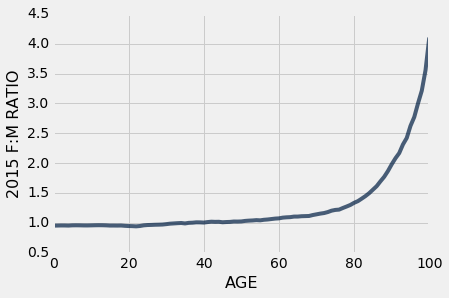

In [40]:
ratios.plot('AGE')